## What is joblib?

joblib is a Python library used to save and load large Python objects efficiently.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## What is game_data.csv?

The game_data.csv is the data file which contains the information about how the levels are defined "Easy", "Medium" or "Hard" based on "time taken by the player", "Number of Pairs", "Moves made by player", "Incorrect moves made by player".

This data file is connected to my main game file which means the number of times I play the game the data gets added to the game_data.csv. Its ultimately the real-time data fetching file.

In [2]:
df = pd.read_csv("game_data.csv")
df.head()

,Timestamp,Time,Number Of Pairs,Moves,Incorrect,Difficulty
0,2025-05-05 19:23:04,201,8,17,9,Easy
1,2025-05-05 19:28:10,262,8,17,9,Medium
2,2025-05-05 19:40:38,556,8,20,12,Hard
3,2025-05-05 21:00:00,180,8,18,10,Easy
4,2025-05-05 21:10:00,75,8,16,8,Easy


In [3]:
df = df.drop(columns=["Timestamp"])

label_encoder = LabelEncoder()  # Encode difficulty labels
df["Difficulty_Label"] = label_encoder.fit_transform(df["Difficulty"])

X = df[["Time", "Number Of Pairs", "Moves", "Incorrect"]]
y = df["Difficulty_Label"]

print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Label Mapping: {'Easy': 0, 'Hard': 1, 'Medium': 2}


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Why Random Forest Classifier

Handles Nonlinear Relationships : Random Forest can model complex, nonlinear relationships between features like Time, Moves, and Incorrect attempts — which are often not linearly related to difficulty.

Works Well with Mixed Feature Types : Whether your features are continuous (like Time) or discrete (like Incorrect), Random Forest can handle them without much preprocessing (e.g., no need for scaling).

Robust to Outliers and Noise : In real-world data (especially from human performance), you get inconsistent behavior and outliers. Random Forest is less sensitive to these compared to algorithms like Logistic Regression or SVM.

Feature Importance : Random Forest gives you feature importance scores, helping you understand which inputs matter most in predicting difficulty — useful for interpretability.

Good Accuracy with Minimal Tuning : You often get strong baseline performance with Random Forests without heavy hyperparameter tuning — ideal for prototyping and production.

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

        Easy       1.00      1.00      1.00        11
        Hard       1.00      1.00      1.00        10
      Medium       1.00      1.00      1.00         3

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



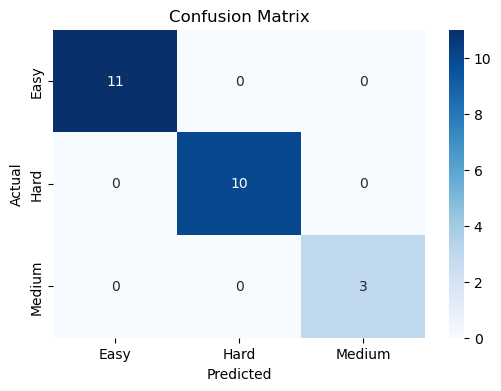

Model and label encoder saved as 'difficulty_model.pkl' and 'label_encoder.pkl'.


In [6]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred) # Confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

joblib.dump(model, "difficulty_model.pkl") 
joblib.dump(label_encoder, "label_encoder.pkl")
print("Model and label encoder saved as 'difficulty_model.pkl' and 'label_encoder.pkl'.")

## Easy (11 examples in test data):

Precision = 1.00 → Of all the times the model predicted "Easy", 100% were actually Easy.
Recall = 1.00 → Of all the actual Easy questions, the model correctly found 100% of them.
F1-score = 1.00 → A perfect score combining precision and recall.

This means the model made no mistakes for Easy.

## Hard (10 examples):

Same perfect scores:
Precision = 1.00
Recall = 1.00
F1-score = 1.00

No errors in predicting Hard either.

## Medium (3 examples):

Again, perfect precision, recall, and F1.
Even though there were only 3 Medium cases, the model got them all right.




## Overall Score

| Metric           | Meaning in Simple Terms                                    | Score       |
| ---------------- | ---------------------------------------------------------- | ----------- |
| **Accuracy**     | Out of all 24 predictions, how many were correct?          | 1.00 (100%) |
| **Macro avg**    | Average of precision/recall/f1 for each class (unweighted) | 1.00        |
| **Weighted avg** | Average that accounts for how many of each class there are | 1.00        |


## Important Notice

The above scores are based on the data I collected till now.
Ths scores will change over time as more players participate and generate new data.
The growth in data leads to more examples and more accurate scores in future.